In [3]:
import pandas as pd 


change_in_fields = pd.read_pickle('tmp_data/change_in_fields.pkl')


In [16]:
change_in_fields["delta_cl"] = change_in_fields["V20_clFr"] - change_in_fields["V15_clFr"]

In [25]:

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


from matplotlib import ticker



        
        
        
def global_plot(df,z,projection,vmin,vmax,cmap,absolute_values,logscale,title,markersize,savefig,cbar_label):
    
    
        
       # ccrs.Robinson()
        
    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=projection)
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    
    x = df.longitude_ERA
    y = df.latitude_ERA


    z1 = df[z]
    if absolute_values:
        z1 = abs(z1)
        if vmin < 0:
            vmin = 0 # dont need negative vmins if plotting absolute values
    
    
    #Normalize, colorbars
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        
    print(vmin,vmax,logscale)

     #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
    
    
    
    

    
    #Scatter points
    sc = ax.scatter(x,y,transform=ccrs.PlateCarree(), #Always PlateCarree
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    

#     #Set num ticks on coloarbar
#     cb = plt.colorbar()
    tick_locator = ticker.LinearLocator(5)
    cb1.locator = tick_locator
    cb1.update_ticks()
    
    
    
    
    
    
    
    
    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')

    #ax.plot([-180,180],[0,0],transform=ccrs.PlateCarree(),c='0.5', linestyle='--') #Plot the equator


    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(cbar_label,fontsize=34)

    ax.set_title(title)    
    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)   
        
        

In [12]:
cl_map = change_in_fields.query('V20_clFr != 0.0')

0.0 1 False


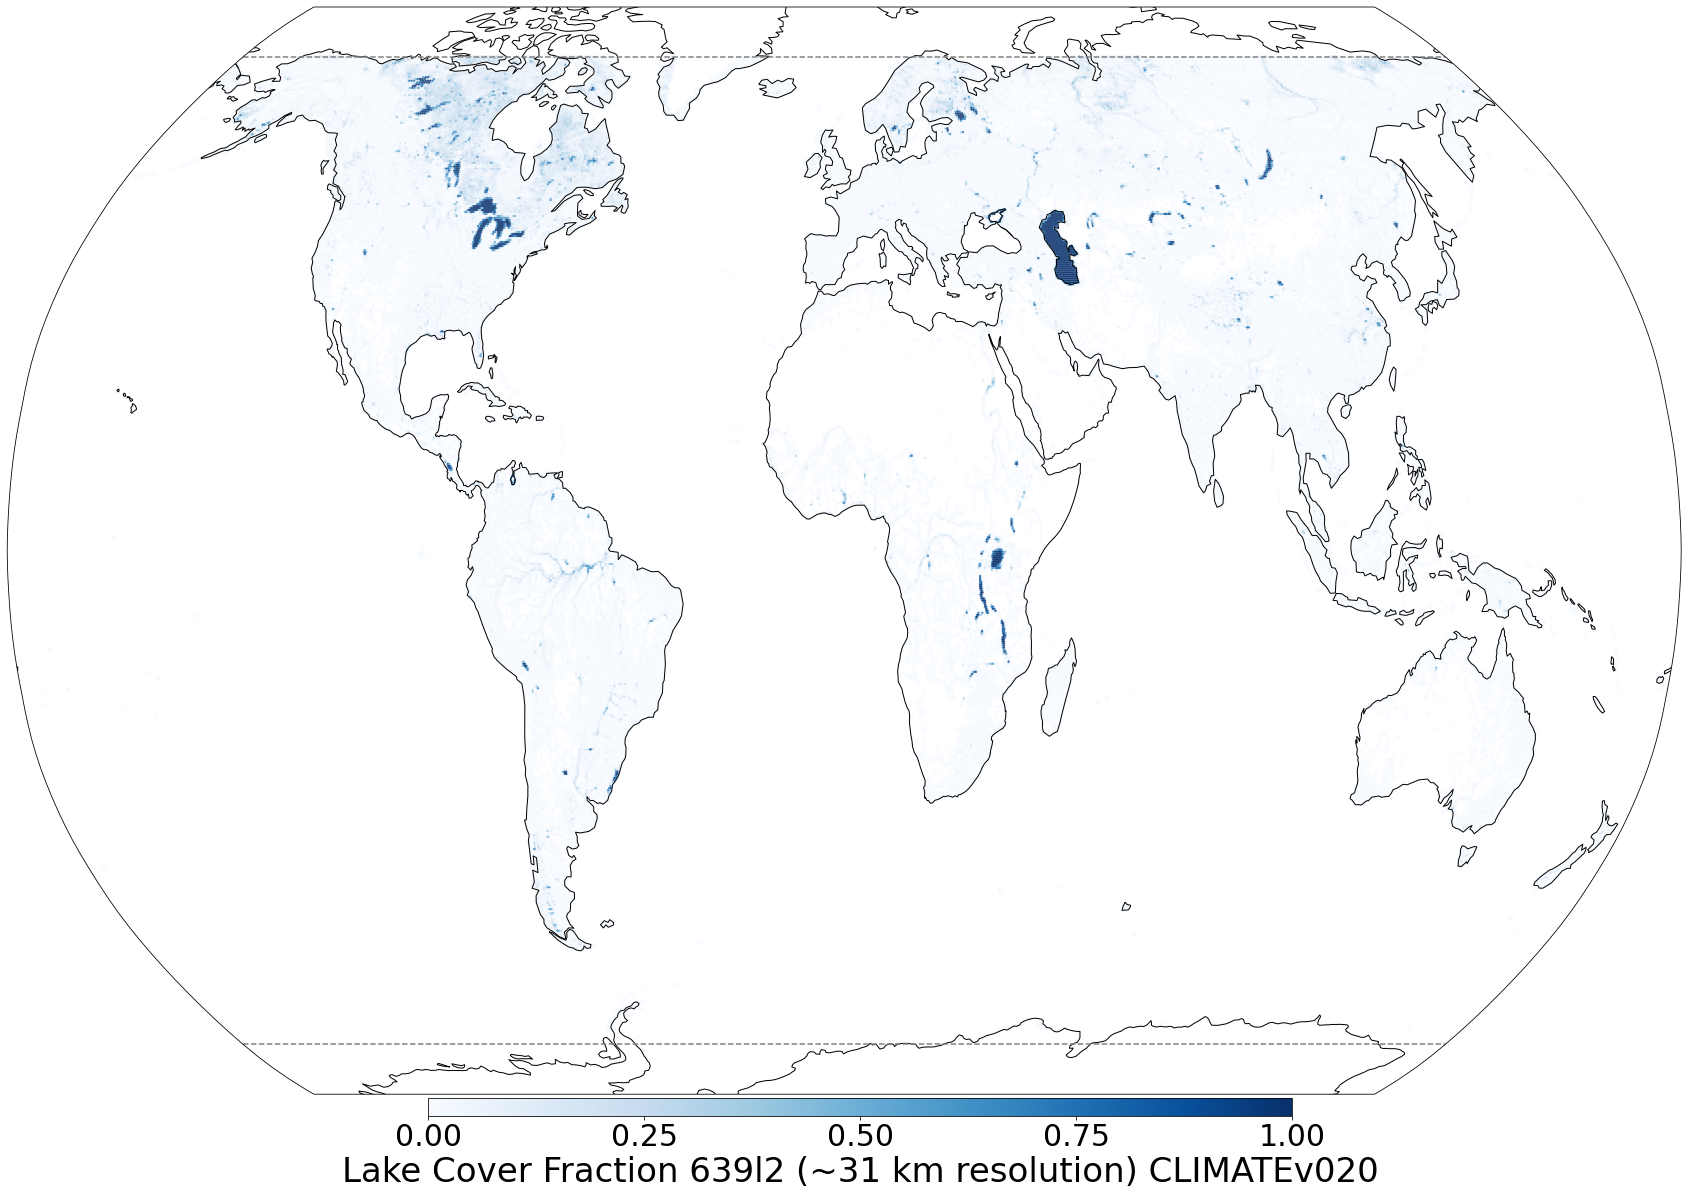

In [32]:


global_plot(cl_map,
            'V20_clFr',
            projection=ccrs.Robinson(), #ccrs.PlateCarree() , ccrs.Robinson()
            vmin=0.00,vmax=1,
            cmap=plt.cm.Blues,
            absolute_values = True,
            logscale=False,
            title=None,
            markersize=2,
            savefig='images/cl_map',
            cbar_label='Lake Cover Fraction 639l2 (~31 km resolution) CLIMATEv020')

-0.5 0.5 False


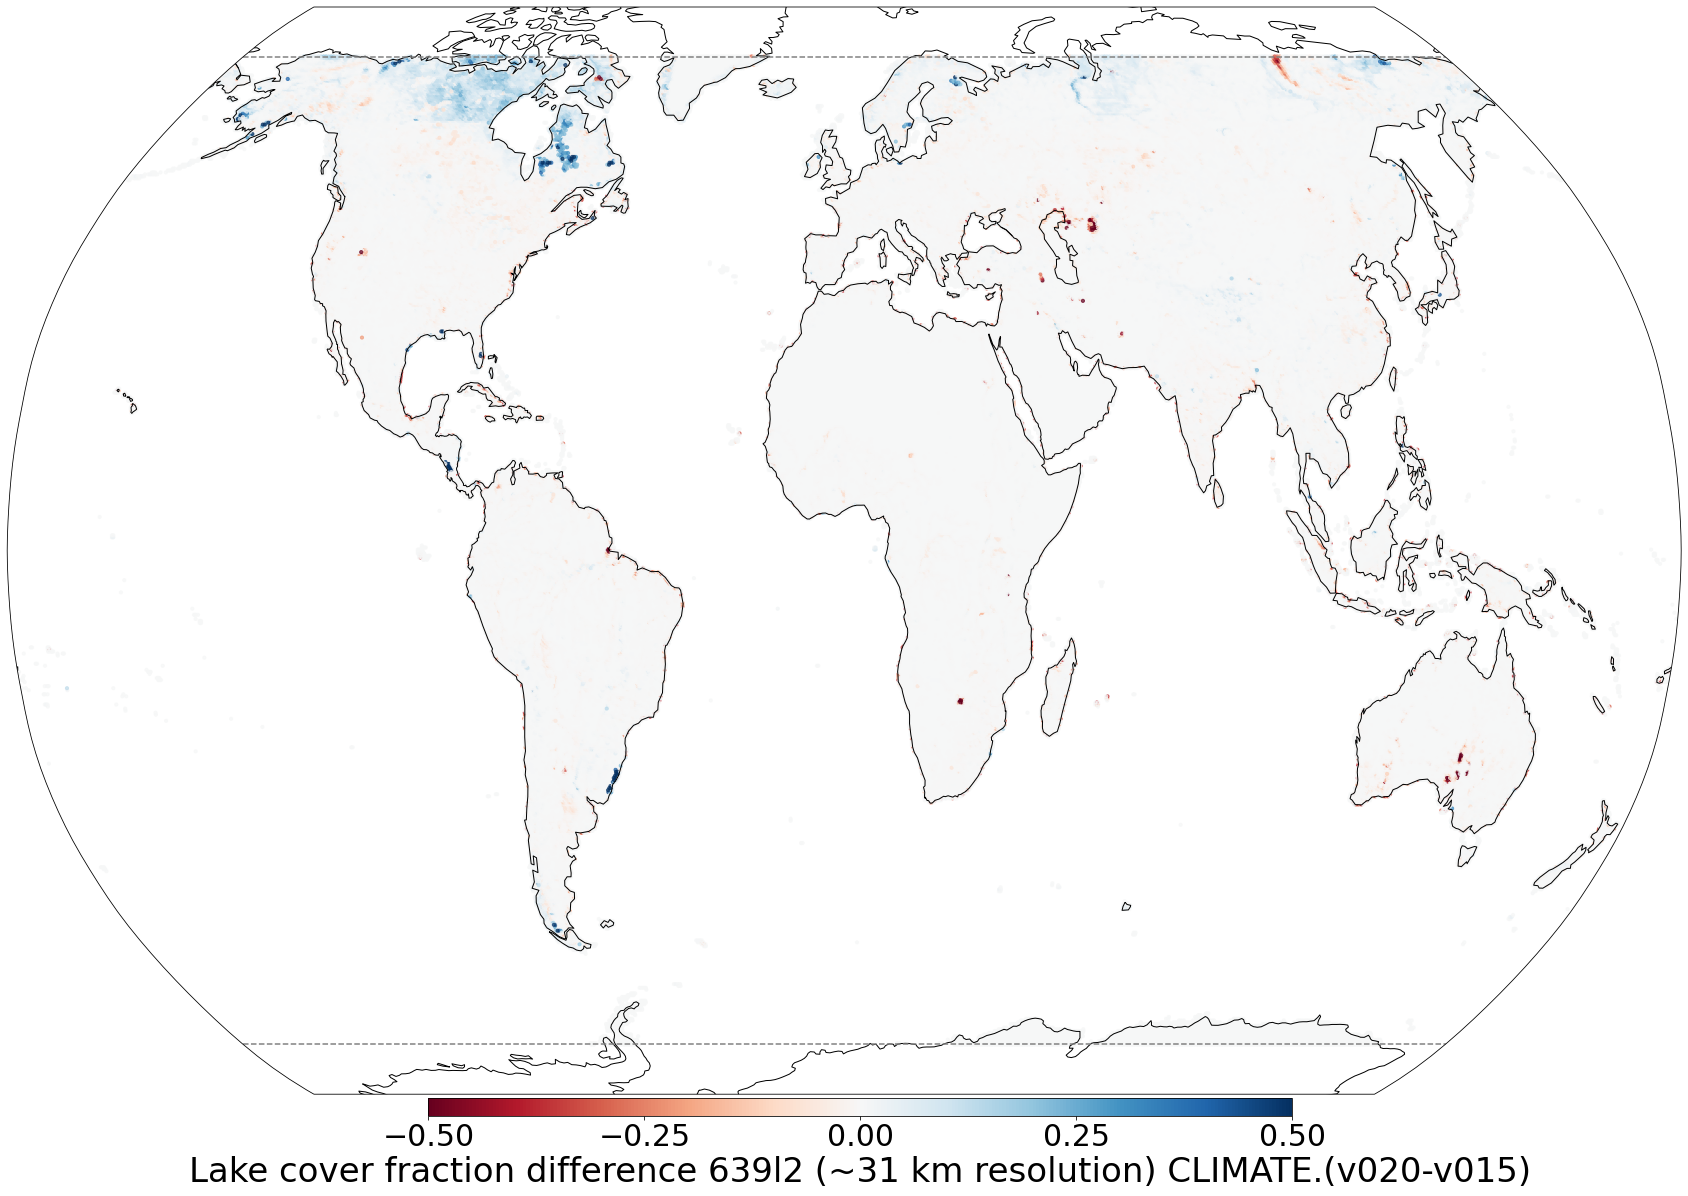

In [33]:


global_plot(change_in_fields,
            'delta_cl',
            projection=ccrs.Robinson(), #ccrs.PlateCarree() , ccrs.Robinson()
            vmin=-0.5,vmax=0.5,
            cmap=plt.cm.RdBu,
            absolute_values = False,
            logscale=False,
            title=None,
            markersize=10,
            savefig='images/cl_delta_map',
            cbar_label='Lake cover fraction difference 639l2 (~31 km resolution) CLIMATE.(v020-v015)')

In [22]:
change_in_fields["delta_cl"]

0        -0.142358
1        -0.133981
2        -0.081134
3        -0.133640
4        -0.028027
            ...   
149805    0.000030
149806    0.000030
149807    0.000030
149808    0.000030
149809    0.000030
Name: delta_cl, Length: 149810, dtype: float64